In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
mental_health = pd.read_excel('search_term_us.xlsx')
mental_health.head()

,Week,depression,anxiety,obsessive compulsive disorder,ocd,insomnia,panic attack,mental health,counseling,psychiatrist
0,2019-06-16,70,89,37,69,77,73,61,88,73
1,2019-06-23,70,91,51,73,83,71,62,89,66
2,2019-06-30,63,87,41,70,74,75,53,72,76
3,2019-07-07,74,92,60,74,84,77,63,88,89
4,2019-07-14,70,92,70,77,81,77,60,88,61


In [5]:
mental_health.describe().T

,count,mean,std,min,25%,50%,75%,max
depression,51.0,84.294118,11.377687,62.0,72.5,86.0,94.5,100.0
anxiety,51.0,91.784314,4.588306,75.0,89.5,92.0,95.0,100.0
obsessive compulsive disorder,51.0,60.470588,12.579909,25.0,53.5,63.0,67.0,100.0
ocd,51.0,78.549020,7.874805,65.0,72.0,78.0,84.5,100.0
insomnia,51.0,83.450980,7.343878,66.0,80.0,84.0,87.0,100.0
panic attack,51.0,78.000000,6.434283,67.0,74.0,77.0,80.0,100.0
mental health,51.0,66.549020,9.355883,40.0,61.0,66.0,73.0,100.0
counseling,51.0,83.823529,14.714219,50.0,68.5,90.0,96.0,100.0
psychiatrist,51.0,56.078431,20.256202,23.0,37.0,56.0,74.0,100.0


In [6]:
corrmat = mental_health.corr()

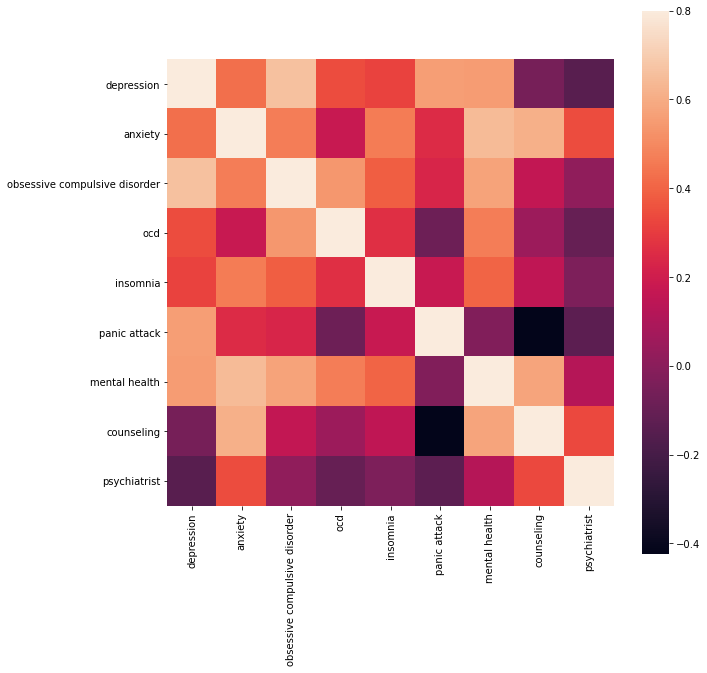

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

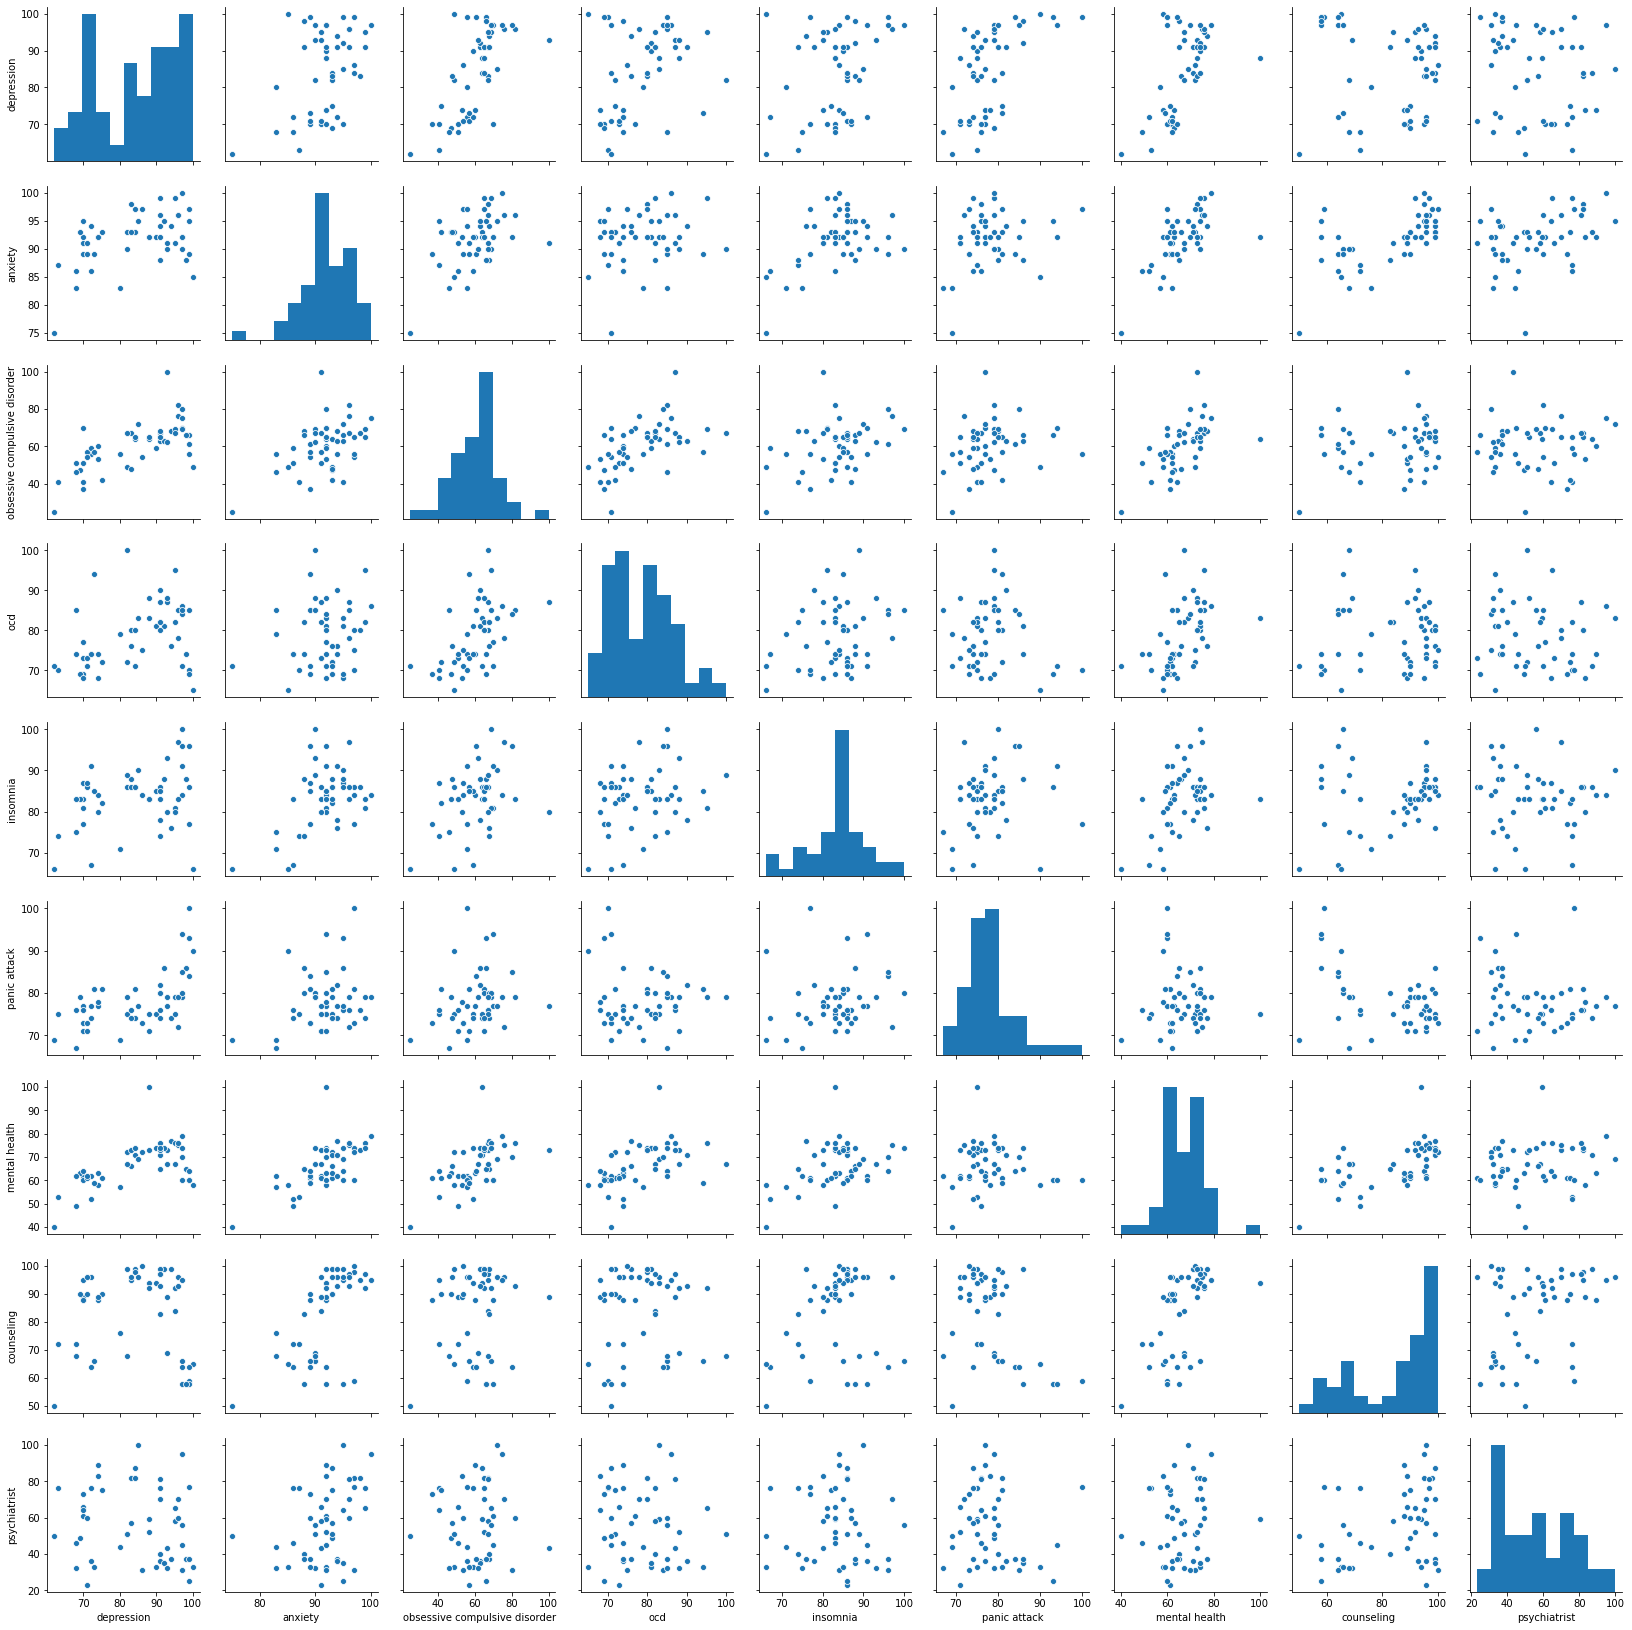

In [9]:
sns.pairplot(mental_health)
plt.show()

## Clustering

- KMeans
- Hierarchical
- Mean Shift
- DBSCAN

### KMeans

In [63]:
X = mental_health.drop(['Week'], axis=1)

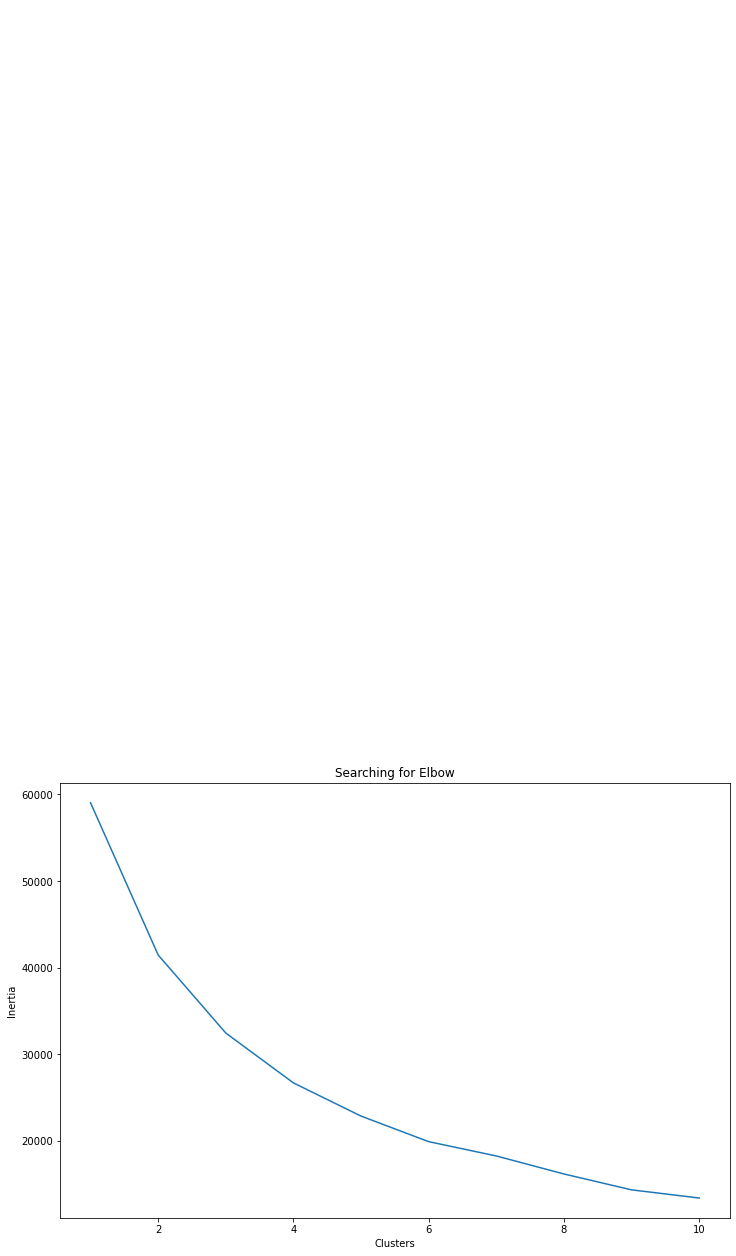

In [93]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

On obsorving the graph, the optimal clusters is 3 and 5

### Hyphothesis

Hyphothesis 1: Depression leading to panic attacks

### KMeans

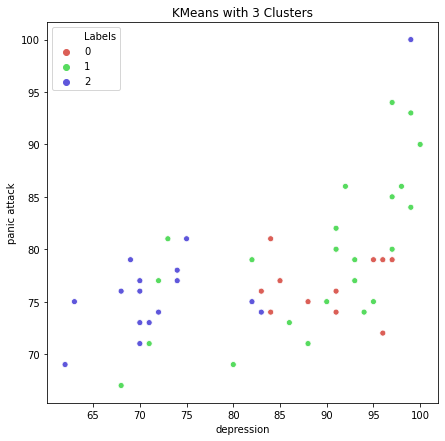

In [89]:
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(7, 7))
sns.scatterplot(X['depression'], X['panic attack'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

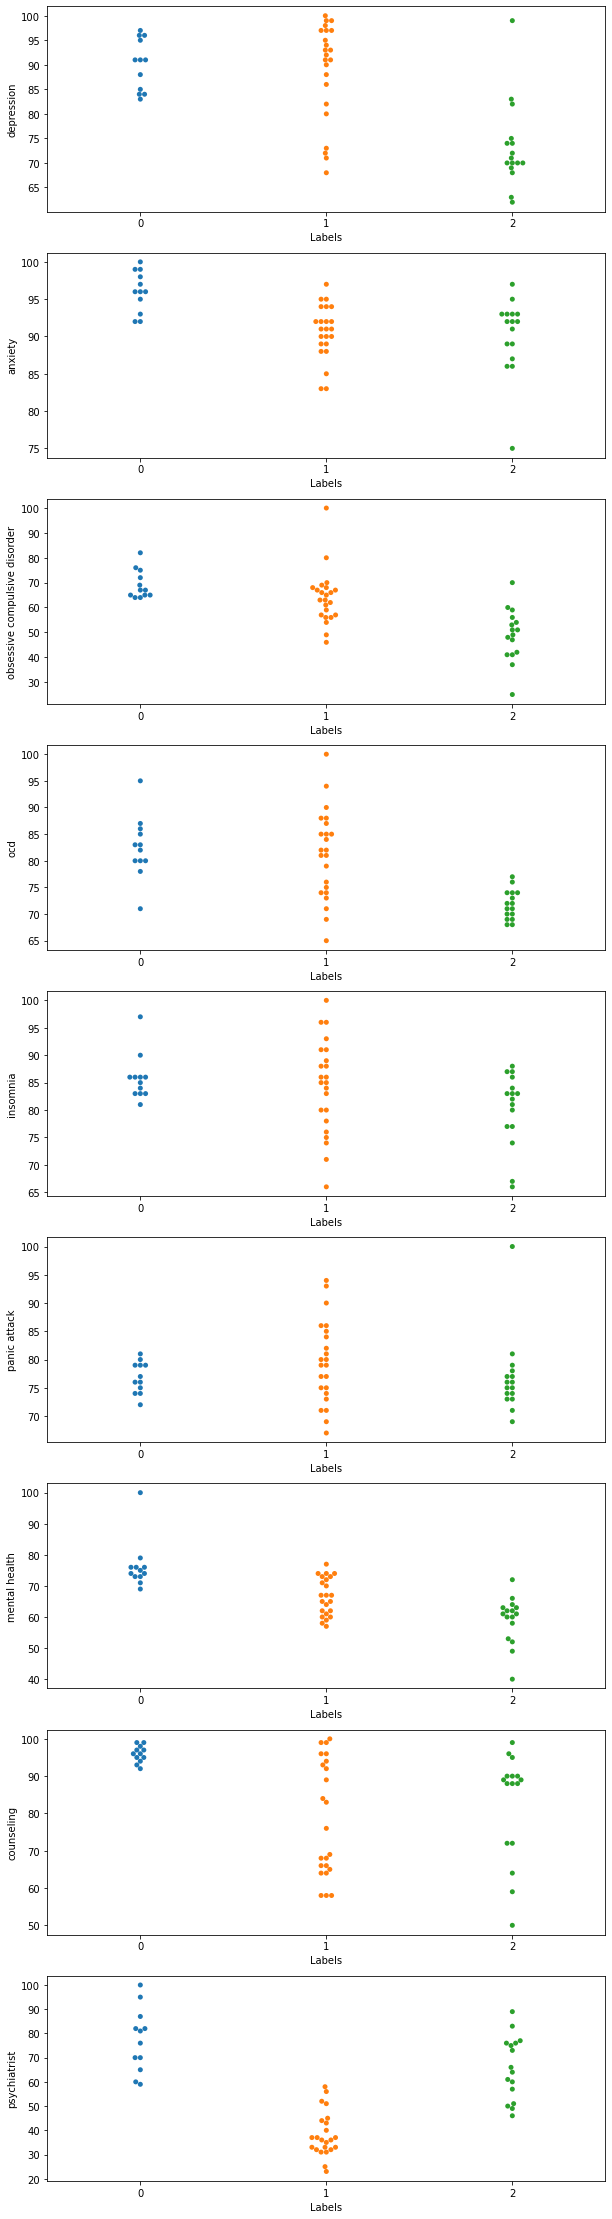

In [90]:
fig, axs = plt.subplots(nrows = 9, ncols=1, figsize = (10,40))

for i, cols in enumerate(X.iloc[:,:9].columns.tolist()):
    sns.swarmplot(x='Labels', y=cols, data=X, ax=axs[i])

plt.show()

### Hierarchical Clustering 

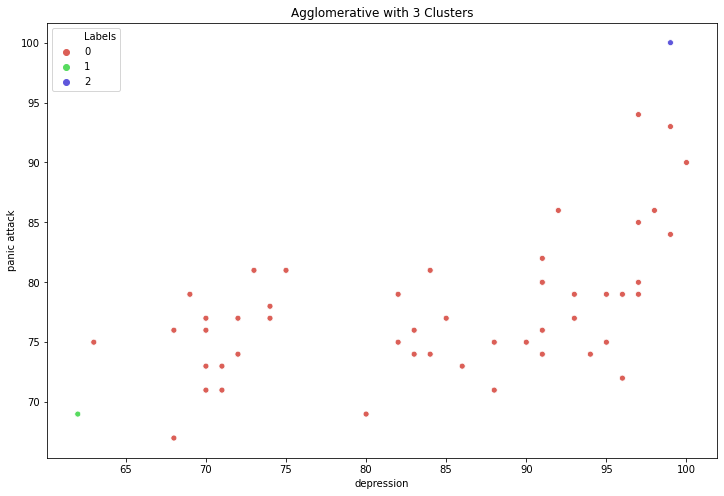

In [95]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['depression'], X['panic attack'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('Agglomerative with 3 Clusters')
plt.show()

In [96]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X, X)
print(dist)

[[ 0.         17.52141547 20.29778313 ... 55.73149917 57.00877125
  49.989999  ]
 [17.52141547  0.         27.22131518 ... 43.829214   47.12748667
  43.74928571]
 [20.29778313 27.22131518  0.         ... 54.99090834 54.89990893
  48.87739764]
 ...
 [55.73149917 43.829214   54.99090834 ...  0.         25.0998008
  40.45985665]
 [57.00877125 47.12748667 54.89990893 ... 25.0998008   0.
  23.93741841]
 [49.989999   43.74928571 48.87739764 ... 40.45985665 23.93741841
   0.        ]]


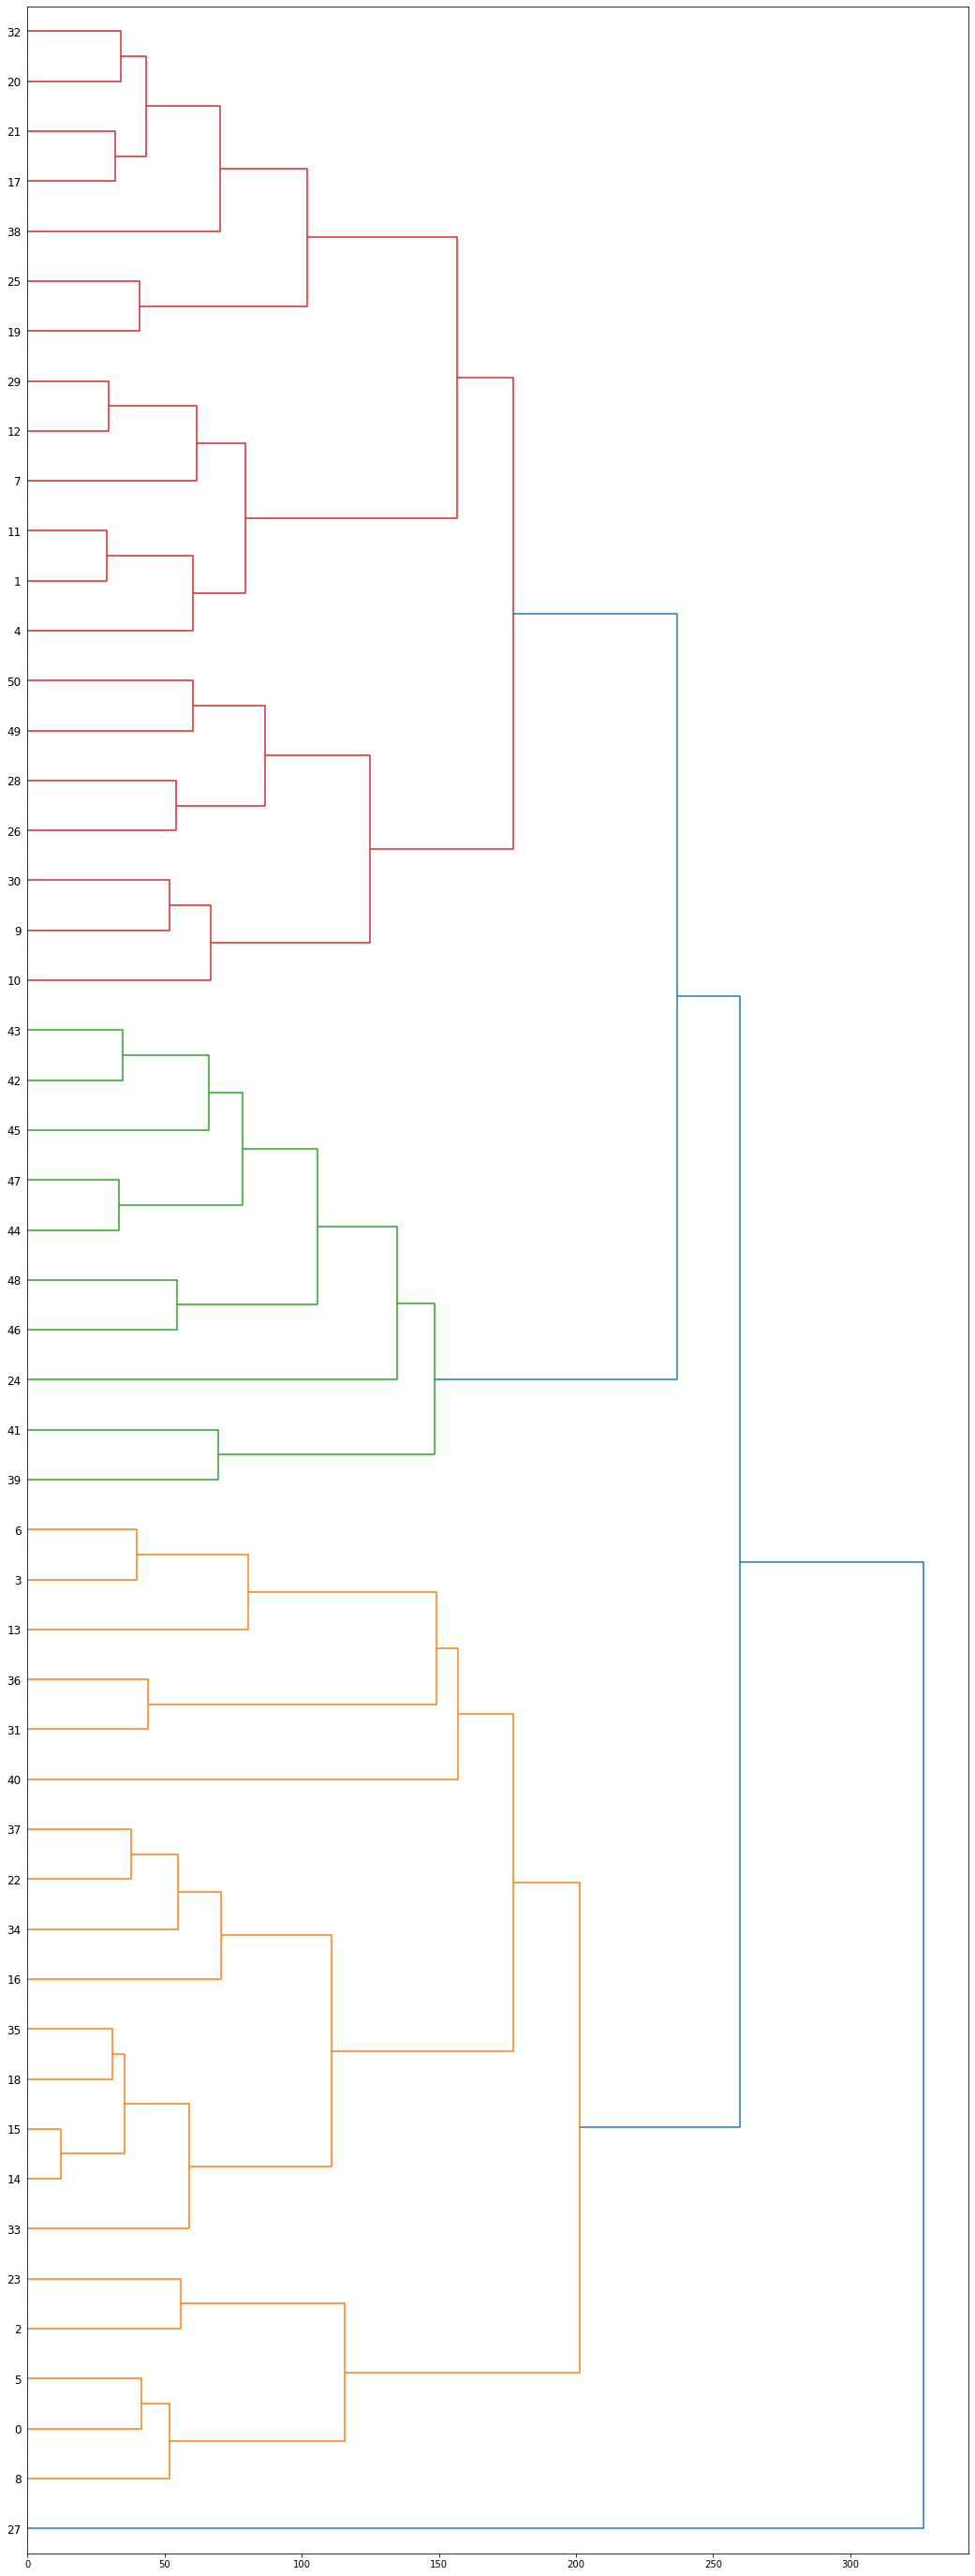

In [100]:
Z = hierarchy.linkage(dist, 'complete')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

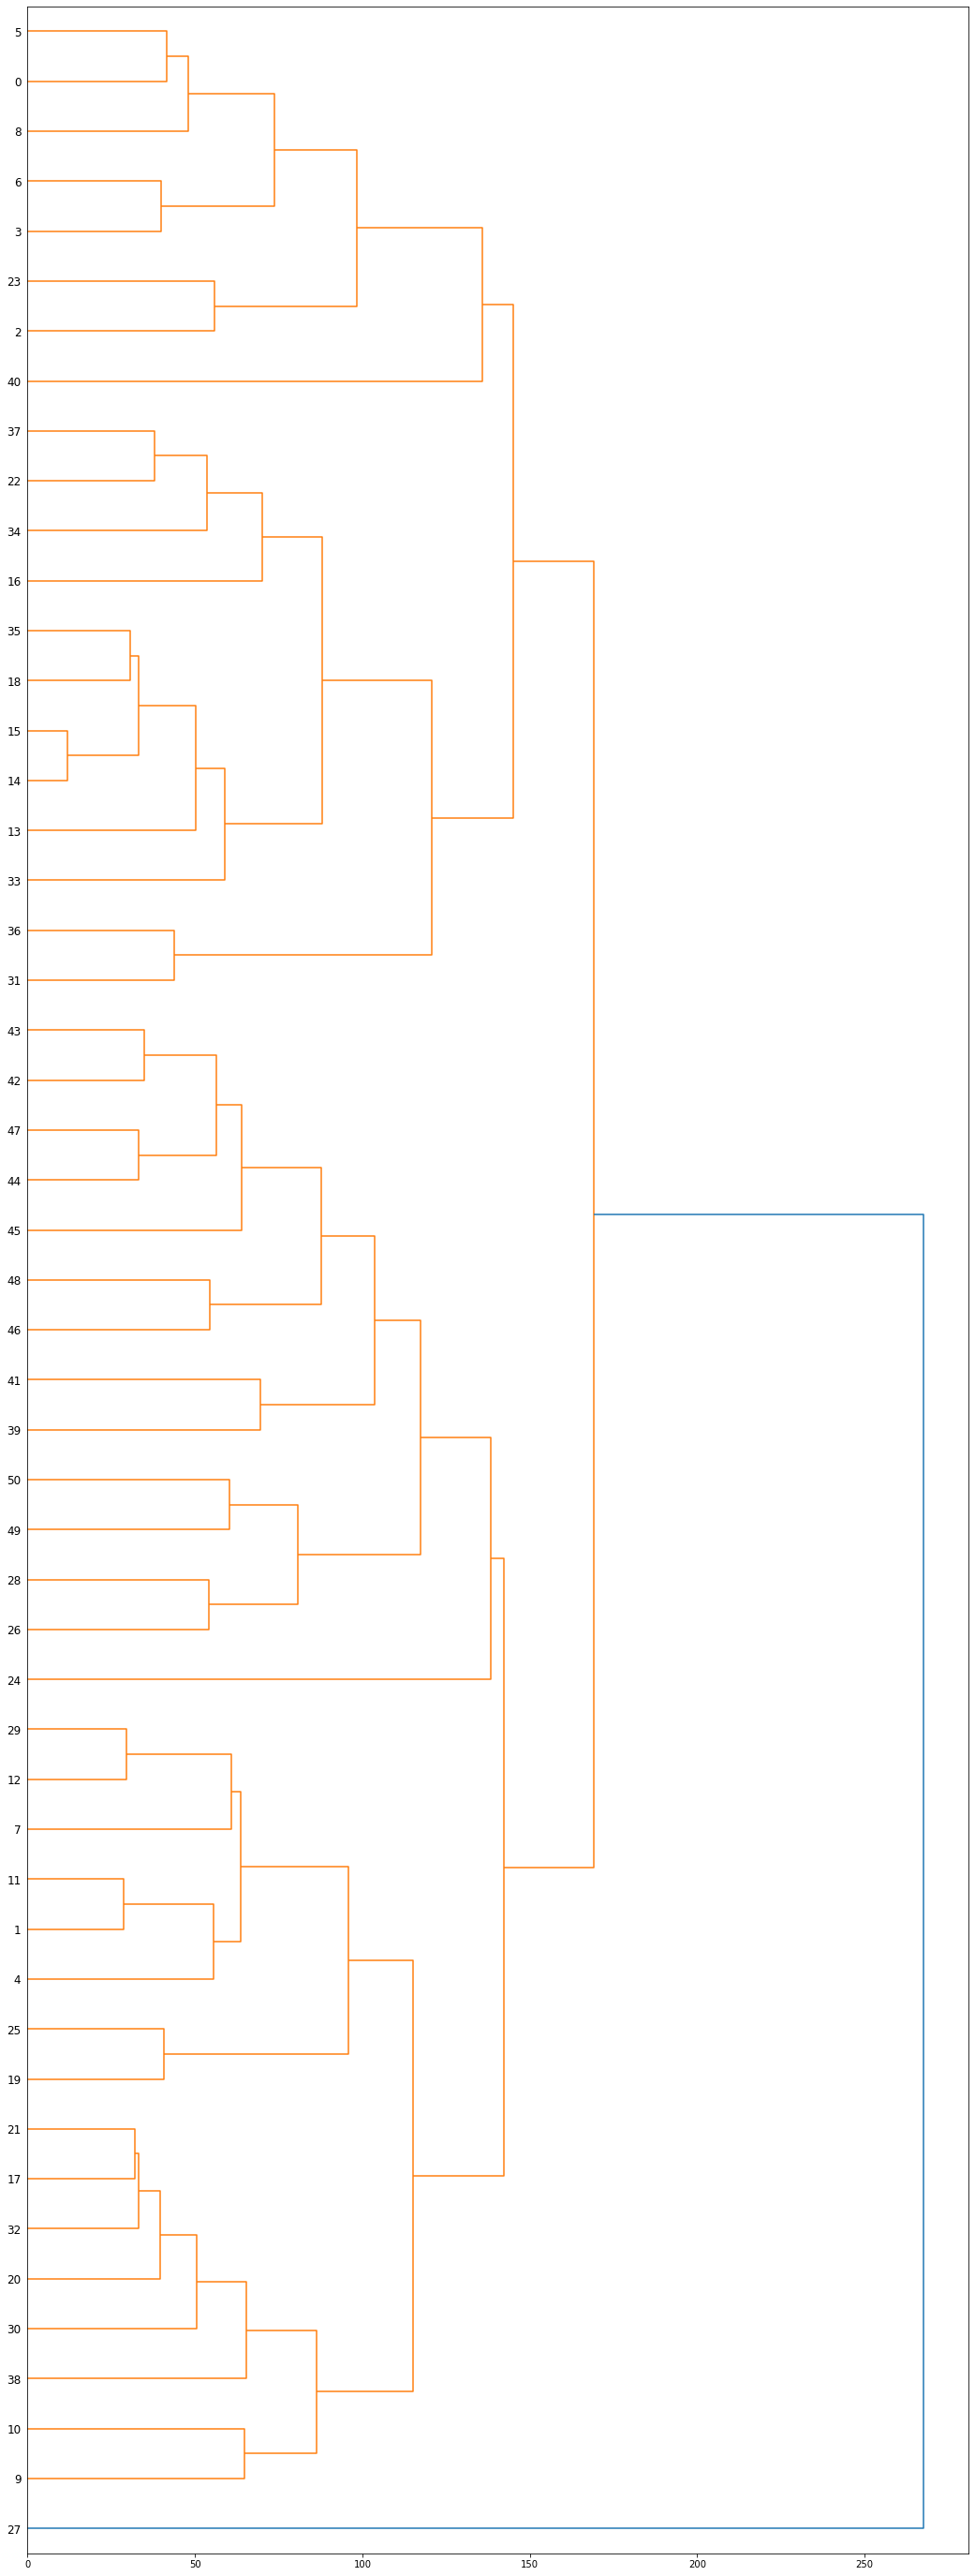

In [101]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')


### MeanShift

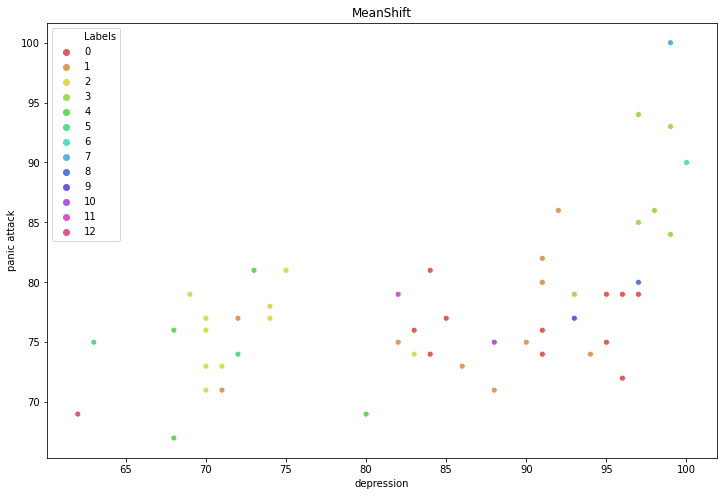

In [105]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth).fit(X)

X['Labels'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['depression'], X['panic attack'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

### DBSCAN

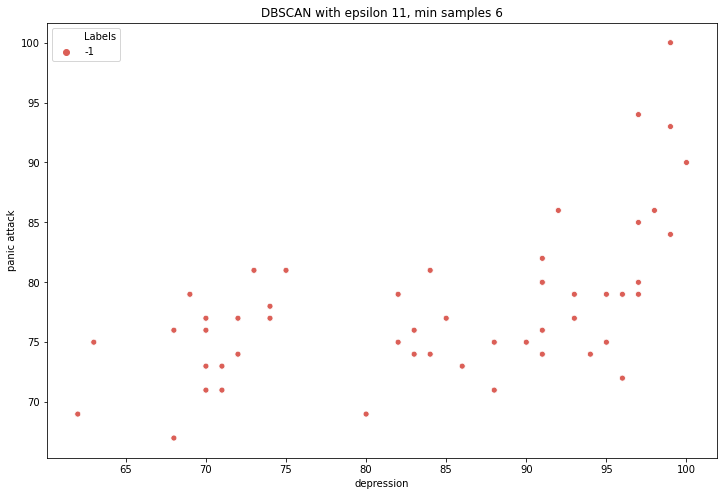

In [106]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=6).fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['depression'], X['panic attack'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()